<a href="https://colab.research.google.com/github/thinkGrow/Neural-Network-CSC424/blob/main/nn_3a_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt     

In [ ]:
# TRAIN INITIALIZE :

np.random.seed(42)
cat_images = np.random.randn(500, 2) + np.array([0, -3])
mouse_images = np.random.randn(500, 2) + np.array([3, 3])
dog_images = np.random.randn(500, 2) + np.array([-3, 3])

x_train = np.vstack([cat_images, mouse_images, dog_images])
#first 500 elements have been labeled as 0,
#next 500 elements have been labeled as 1 
#last 500 elements have been labeled as 2

labels = np.array([0]*500 + [1]*500 + [2]*500) # (1500,)
#y_train after for loop : 
# [1
#  1
#     1
#     1
#        1
#        1]
# 
y_train = np.zeros((1500, 3)) #(1500,3)
for i in range(1500):
    y_train[i, labels[i]] = 1

In [ ]:
#TEST INITIALIZE:
    
cat_images_test = np.random.randn(200, 2) + np.array([0, -3])
mouse_images_test = np.random.randn(200, 2) + np.array([3, 3])
dog_images_test = np.random.randn(200, 2) + np.array([-3, 3])

x_test = np.vstack([cat_images_test, mouse_images_test, dog_images_test])
#first 500 elements have been labeled as 0,
#next 500 elements have been labeled as 1 
#last 500 elements have been labeled as 2
labels_test = np.array([0]*200 + [1]*200 + [2]*200) # (600,)
#y_train after for loop : 
# [1
#  1
#     1
#     1
#        1
#        1]
# 
y_test = np.zeros((600, 3)) #(600,3)
for i in range(600):
    y_test[i, labels_test[i]] = 1

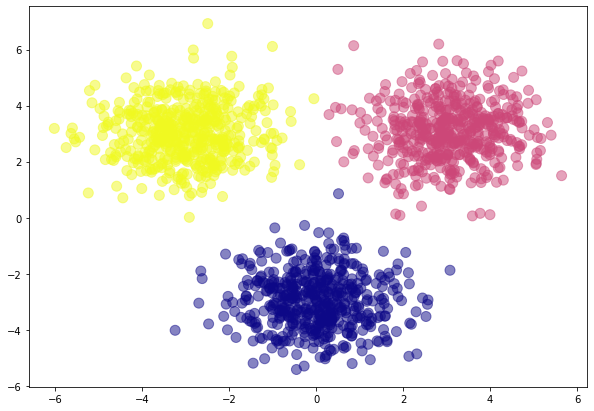

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train[:,0], x_train[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

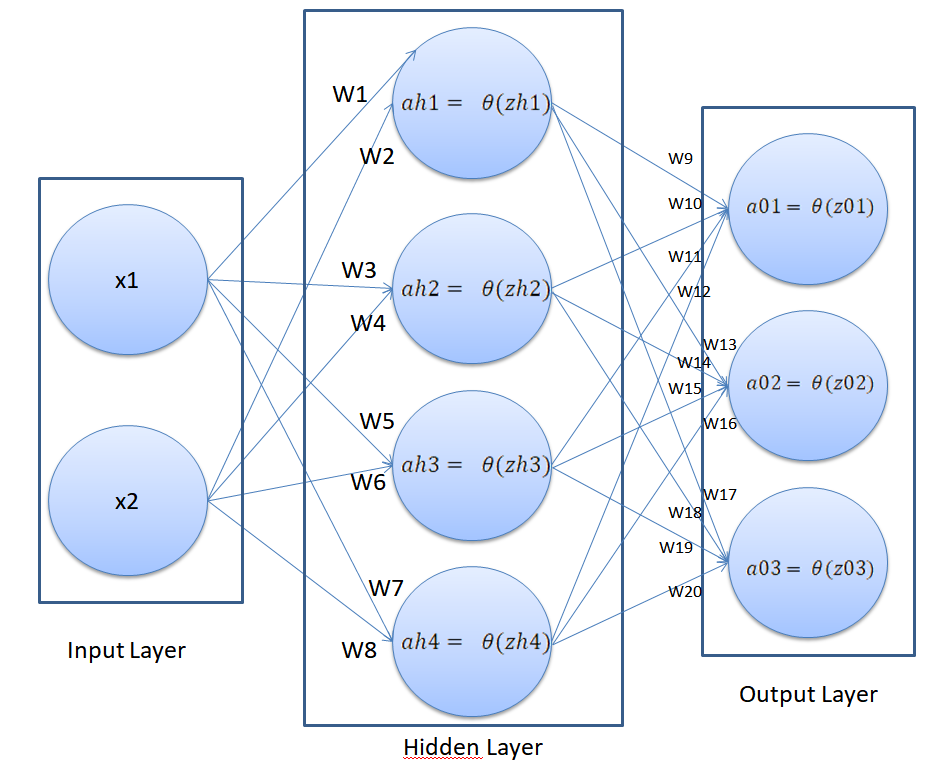

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [ ]:
class NeuralNetwork:
    def __init__(self, x_train, y_train, x_test):    
        hidden_nodes = 4
        output_labels = 3
        instances = x_train.shape[0]
        attributes = x_train.shape[1]
        self.w1 = np.random.rand(attributes,hidden_nodes)
        self.b1 = np.random.randn(hidden_nodes)

        self.w2 = np.random.rand(hidden_nodes,output_labels)
        self.b2 = np.random.randn(output_labels)
        self.lr = 10e-4
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        
    
    def train(self) :    
        w1 = self.w1
        b1 = self.b1
        w2 = self.w2
        b2 = self.b2
        lr = self.lr
        x_train = self.x_train
        y_train = self.y_train       
        
        error_cost = []

        for epoch in range(2000):
        ############# feedforward

            # Phase 1
            z1 = np.dot(x_train, w1) + b1
            a1 = sigmoid(z1)

            # Phase 2
            z2 = np.dot(a1, w2) + b2
            a2 = softmax(z2)

        ########## Back Propagation

        ########## Phase 1

            dL_dz2 = a2 - y_train  # dL_da2 (gradient of loss function) * da_dz (gradient of activation function)
            dz2_dw2 = a1

            dL_w2 = np.dot(dz2_dw2.T, dL_dz2)

            dL_b2 = dL_dz2

        ########## Phases 2

            dz2_da1 = w2
            dL_da1 = np.dot(dL_dz2 , dz2_da1.T)
            da1_dz1 = sigmoid_der(z1)
            dz1_dw1 = x_train
            dL_w1 = np.dot(dz1_dw1.T, da1_dz1 * dL_da1)

            dL_b1 = dL_da1 * da1_dz1

            # Update Weights ================

            w1 -= lr * dL_w1
            b1 -= lr * dL_b1.sum(axis=0)

            w2 -= lr * dL_w2
            b2 -= lr * dL_b2.sum(axis=0)

            if epoch % 500 == 0:
                loss = np.sum(-y_train * np.log(a2)) #negative log likelihood
                print('Loss function value: ', loss)
                error_cost.append(loss)
        
        self.w1 = w1
        self.w2 = w2
        
    
    def test(self):    
        w1 = self.w1
        w2 = self.w2
        lr = self.lr
        
        for epoch in range(10):
            # feedforward
            z1 = np.dot(x_test, w1)
            a1 = sigmoid(z1)

            z2 = np.dot(a1, w2)
            a2 = softmax(z2) 
            
        return a2

In [ ]:
nn = NeuralNetwork(x_train, y_train, x_test)
nn.train()
y_predict = nn.test()

index = np.argmax(y_predict, axis=1)
y_predict_ohe = np.zeros((600,3))
for i in range(600):    
    for j in range(3):
        if j == index[i]:
              y_predict_ohe[i][index[i]]= 1
        else: y_predict_ohe[i][j]=0 

Loss function value:  1860.8693002658647
Loss function value:  8.185463697329515
Loss function value:  5.044256562216958
Loss function value:  3.7960477167077515


In [ ]:
#Accuracy

import pandas as pd
from sklearn.metrics import accuracy_score

print(f'Accuracy : { accuracy_score(y_test,y_predict_ohe)}' )

Accuracy : 0.985
